# Test model functions

In [13]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
def remove_value(array, value=1, axis=0):
	array = np.nancumsum(array, axis=axis)
	array[array <= value] = 0
	array[array > 0] = 1
	return array

def shrink_region(array):
	array = np.array(array, dtype=int)
	array[array < 0] = 0
	array[array > 0] = 1
	
	aux = array.copy()
	array[np.diff(aux, prepend=0, axis=1) == 1] = 0
	array[np.diff(aux, prepend=0, axis=0) == 1] = 0
	array[np.diff(aux, append=0, axis=0) == -1] = 0
	array[np.diff(aux, append=0, axis=1) == -1] = 0
	
	#forward = remove_value(array, value=1, axis=0)
	#forward = forward*remove_value(array, value=1, axis=1)

	#backward = np.flip(remove_value(np.flip(array, 0), value=1, axis=0),0)
	#backward = backward*np.flip(remove_value(np.flip(array, 1), value=1, axis=1), 1)

	#return forward*backward
	return array

def expand_region(array):
	"""
    Shrinks a binary region in a 2D array by removing 
    pixels around the regions.

    Parameters
	----------
    array:numpy array
		2D NumPy array of integers. 

    Returns
	-------
    	2D NumPy array with the shrunk region.

    This function first converts the input array to integers. 
    Then, it identifies and removes single-pixel protrusions 
    from the binary region represented by non-zero values 
    in the array. 
    """
	array = np.array(array, dtype=int)
	array[array < 0] = 0
	array[array > 0] = 1
	
	aux = array.copy()
	array[np.diff(aux, append=0, axis=1) == 1] = 1
	array[np.diff(aux, append=0, axis=0) == 1] = 1
	array[np.diff(aux, prepend=0, axis=0) == -1] = 1
	array[np.diff(aux, prepend=0, axis=1) == -1] = 1
	
	return array

In [7]:
def random_surface(n = 200):
    # Make the X, Y meshgrid instead of np.tile
    xs = np.linspace(-2*np.pi, 2*np.pi, n)
    ys = np.linspace(-2*np.pi, 2*np.pi, n)
    tau, phi = np.meshgrid(xs, ys) 
    # Z evaluation
    amp = np.sin(tau)+np.cos(phi) 
    amp[amp > 0.5] = 1
    amp[amp <= 0.5] = 0
    return amp

In [22]:
def plot_array(a):
    #fig, ax=plt.subplots(1,2)
    plt.imshow(a)
    plt.imshow(shrink_region(a), alpha=0.5)

def plot_array_expand(a):
    #fig, ax=plt.subplots(1,2)
    plt.imshow(a)
    plt.imshow(expand_region(a), alpha=0.5)

In [23]:
a = [[0,0,0,0,0,0],[0,1,1,1,1,0],[0,0,1,1,1,0],[0,1,1,1,1,0],[0,1,1,1,1,0],[0,0,0,0,0,0]]

In [24]:
a = [[0,0,0,0,0,0,0,0,0,0,0],[0,1,1,1,1,0,1,1,1,1,0],[0,1,1,1,1,0,1,1,1,1,0],[0,1,1,1,1,0,1,1,1,1,0],[0,1,1,1,1,0,1,1,1,1,0],[0,1,1,1,1,0,1,1,1,1,0]]

In [25]:
a_sink = shrink_region(a)

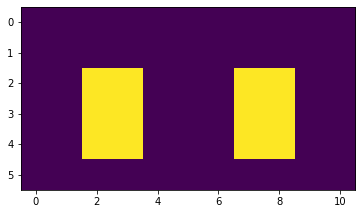

In [26]:
plt.imshow(a_sink)

In [27]:
b=np.array([0,1,1,1,1,0,1,1,1,1,0])

In [28]:
np.diff(b, append=0, axis=0)

array([ 1,  0,  0,  0, -1,  1,  0,  0,  0, -1,  0])

In [29]:
b = random_surface(n=25)

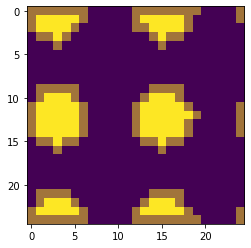

In [30]:
plot_array(b)

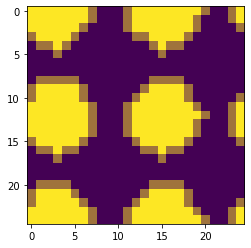

In [31]:
plot_array_expand(b)

In [ ]:
b = np.random.rand(100, 100)
b[b < 0.4] = 0
b[b >= 0.4] = 1